In [68]:
import os
import numpy as np
from PIL import Image
import glob
import pandas as pd
from matplotlib import pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [38]:
data_folder = "../ai_ready"
image_folder = os.path.join(data_folder, "images")
mask_folder = os.path.join(data_folder, "masks")

In [39]:
df = pd.read_csv(os.path.join(data_folder, "x-ai_data.csv"))

In [40]:
df_train = df[df["split"] == "train"]
df_test = df[df["split"] == "test"]

In [61]:
imgs = []

for filename in glob.glob(os.path.join(data_folder, "images/*.png")):
    imgs.append({"basename": os.path.basename(filename)})

for img in imgs:
    img["image"] = Image.open(os.path.join(image_folder, img["basename"])).convert('RGB')
    img["mask"]  = Image.open(os.path.join(mask_folder, img["basename"])).convert('RGB')

interactive(children=(FloatSlider(value=0.0, description='t', max=1998.0, step=1.0), Output()), _dom_classes=(…

<function __main__.img_mask(t)>

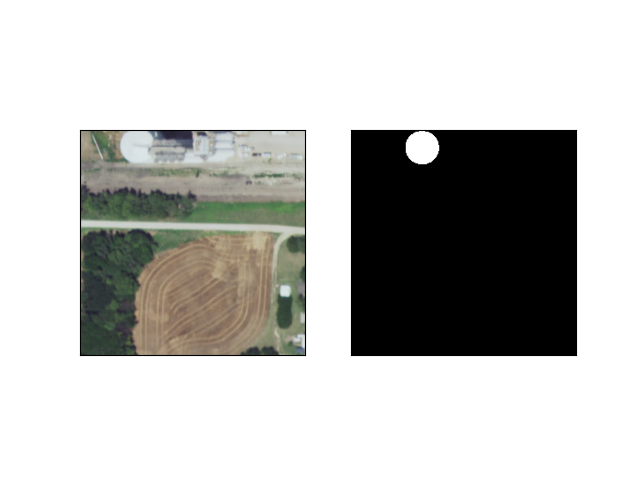

In [113]:
fig, ax = plt.subplots(1,2)
for a in ax:
    a.set_xticks([])
    a.set_yticks([])
    
def img_mask(t):
    for a in ax:
        a.cla()
        a.set_xticks([])
        a.set_yticks([])
        
    ax[0].imshow(imgs[int(t)]["image"])
    ax[1].imshow(imgs[int(t)]["mask"])
    fig.canvas.draw_idle()

interact(img_mask, t = widgets.FloatSlider(value=int(0),
                                               min=int(0),
                                               max=len(imgs)-1,
                                               step=1))
